In [1]:
import pandas as pd
import nltk, re, pprint,random
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.classify import SklearnClassifier
from nltk import pos_tag, word_tokenize, NaiveBayesClassifier, classify, bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
import re
import string
import re, math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# read in airline reviews
airline_data = pd.read_csv('airline.csv', encoding = 'latin1')

In [3]:
#create a smaller dataframe of just the airlines name and the review for easier analysis.
airline = airline_data[['airline_name','content']]

In [9]:
# add the name of the airline to the review for calculating lift frequency 
#with other airlines mentioned in the review
content_air=airline['airline_name']+' '+ airline['content']
content_air
airline['content2']=content_air

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
#list_10

In [104]:
#find the top 10 airlines reviewed. all 41,396 reviews contain the name of the airline.
top_10_airlines_vc=airline['airline_name'].value_counts()[:10]
top_10_airlines=list(top_10_airlines_vc.index.values)
#count number of times top 10 airlines occur in content2
#just value counts for top 10

mask1=(airline_data['airline_name']=='spirit-airlines')
mask2=(airline_data['airline_name']=='british-airways')
mask3=(airline_data['airline_name']=='united-airlines')
mask4=(airline_data['airline_name']=='jet-airways')
mask5=(airline_data['airline_name']=='air-canada-rouge')
mask6=(airline_data['airline_name']=='emirates')
mask7=(airline_data['airline_name']=='ryanair')
mask8=(airline_data['airline_name']=='american-airlines')
mask9=(airline_data['airline_name']=='lufthansa')
mask10=(airline_data['airline_name']=='qantas-airways')
mask_top10=(mask1|mask2|mask3|mask4|mask5|mask6|mask7|mask8|mask9|mask10)
top_10_df=airline_data[mask_top10]
top_10_df=top_10_df.reset_index()

In [7]:
#lift of top 10 brands occurring together
def lift(a, b):
    num = len(airline)
    num_a = len(airline[airline['content2'].str.contains(a)])
    num_b = len(airline[airline['content2'].str.contains(b)])
    if_has_a = airline[airline['content2'].str.contains(a)]
    num_a_and_b = len(if_has_a['content2'][if_has_a['content2'].str.contains(b)])
    return num*float(num_a_and_b)/(num_a * num_b)

In [8]:
lift_df = pd.DataFrame(columns=top_10_airlines, index=top_10_airlines)

for brand1, series in list(lift_df.iterrows()):
    for brand2 in series.index:
        if brand1 != brand2:
            lift_df[brand1].loc[brand2] = lift(brand2, brand1)

lift_df
#here, we see that it is not common to compare airlines in reviews. 
#therefore, when dealing with sentiment, we do not need to worry about proximity

,spirit-airlines,british-airways,united-airlines,jet-airways,air-canada-rouge,emirates,ryanair,american-airlines,lufthansa,qantas-airways
spirit-airlines,NaN,0,0,0,0,0,0,0,0,0
british-airways,0,NaN,0,0,0,0,0,0,0,0
united-airlines,0,0,NaN,0,0,0,0,0,0,0
jet-airways,0,0,0,NaN,0,0.0813441,0,0,0,0
air-canada-rouge,0,0,0,0,NaN,0,0,0,0,0
emirates,0,0,0,0.0813441,0,NaN,0,0,0,0.203921
ryanair,0,0,0,0,0,0,NaN,0,0,0
american-airlines,0,0,0,0,0,0,0,NaN,0,0
lufthansa,0,0,0,0,0,0,0,0,NaN,0
qantas-airways,0,0,0,0,0,0.203921,0,0,0,NaN


In [9]:
#remove stopwords and make all words lower case
#Reed Removes numbers now
stop = stopwords.words('english')
airline_data['content_clean'] = airline_data['content'].str.lower()
airline_data['content_clean'] = airline_data['content_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [10]:
airline_data.content_clean[0]

u"outbound flight fra/prn a319. 2 hours 10 min flight. thought drinks/snacks sale sandwich soft drinks served complimentary. inbound flights skp/lju/fra crj900. 1 hour 30 min flight. skyshop menu seat pocket drinks/snacks sale. flight crews friendly. security check ljubljana airport transit passengers chaos however it's possible go gate within 30min."

In [11]:
airline_data.content[0]

u"Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min."

In [12]:
small=airline_data[:100]

# Function to Find the top 100 words in a Set of Reviews

In [13]:
def content_clean_words(df):
    """
    tokenizes the words in the review
    returns a list of words
    """
    content_list=df.content_clean.values.tolist()
    words=[]
    for i in range(0,len(content_list)):
        words1=word_tokenize(content_list[i])
        words.append(words1)
    return words

In [14]:
def combine_content_words(words):
    """
    combines list of words into one single list
    returns a list of words
    """
    content_words = [item for sublist in words for item in sublist]
    return content_words

In [15]:
def lemmatizer(content_words):
    """
    removes the ending of words in a list
    returns a list of words with the lemmas removed
    """
    content_words_no_punc = [w for w in content_words if w.isalpha()]
    porter=nltk.PorterStemmer()
    filtered_words= [porter.stem(t) for t in content_words_no_punc] #lemmatize
    return filtered_words

In [16]:
def top_words(filtered_words):
    """
    finds the frequency of all of the words in a list
    returns a list of top 100 words by how often they appear in the list
    """
    freqdist = FreqDist(filtered_words)
    top_100=freqdist.most_common(100)
    return top_100

In [17]:
def super_function(df):
    """
    takes in a the airline dataframe and 
    calls content_clean_words, combine_content_words, lemmatizer, and top_words 
    returns a list of words and their frequency
    """
    top=top_words(lemmatizer(combine_content_words(content_clean_words(df))))
    return top

# What Do Reviewers From The Most Represented Countries Care About The Most?
Relative to other top countries

In [18]:
#finds the top nationalities that wrote reviews 
#39805 out of the 41396 reviews have a nationality represented, or about 96% of the reviews.
top_5_origin=airline_data['author_country'].value_counts()[:5]
top_5_origin

United Kingdom    9969
United States     8507
Australia         5062
Canada            3303
Germany           1117
Name: author_country, dtype: int64

In [19]:

def top_words_to_list(a):
    """
    takes in a list of lists of words
    returns a single combined list of words
    """
    top_words_list=[]
    for tup in range(len(a)):
        word=a[tup][0]
        top_words_list.append(word)
    return top_words_list

In [20]:
def top_word_counts(a):
    """
    takes in a list of word frequency
    returns a list of each words frequency
    """    
    count_words_list=[]
    for tup in range(len(a)):
        word=a[tup][1]
        count_words_list.append(word)
    return count_words_list

In [262]:
# create seperate dataframes for each of the top 5 countries.
df_uk=airline_data[airline_data['author_country']=='United Kingdom']
df_us=airline_data[airline_data['author_country']=='United States']
df_aus=airline_data[airline_data['author_country']=='Australia']
df_can=airline_data[airline_data['author_country']=='Canada']
df_ger=airline_data[airline_data['author_country']=='Germany']
#find the top 100 words for each of the top 5 countries
top_uk_words=super_function(df_uk)
top_us_words=super_function(df_us)
top_aus_words=super_function(df_aus)
top_can_words=super_function(df_can)
top_ger_words=super_function(df_ger)

KeyboardInterrupt: 

In [22]:
#normalize the frequency of the top 100 words for each country
#divide each word by the total number of words in each country's reviews (len(content_words))
#build a df with rows=words, col=countries
content_words_us=len(combine_content_words(content_clean_words(df_us)))
content_words_uk=len(combine_content_words(content_clean_words(df_uk)))
content_words_aus=len(combine_content_words(content_clean_words(df_aus)))
content_words_can=len(combine_content_words(content_clean_words(df_can)))
content_words_ger=len(combine_content_words(content_clean_words(df_ger)))
#create lists of the top 100 words for each of the top 5 countries
list_uk_words = top_words_to_list(top_uk_words)
list_us_words = top_words_to_list(top_us_words)
list_aus_words = top_words_to_list(top_aus_words)
list_can_words = top_words_to_list(top_can_words)
list_ger_words = top_words_to_list(top_ger_words)
#create lists of the frequency of the top 100 words for each of the top 5 countries
list_uk_counts = top_word_counts(top_uk_words)
list_us_counts = top_word_counts(top_us_words)
list_aus_counts = top_word_counts(top_aus_words)
list_can_counts = top_word_counts(top_can_words)
list_ger_counts = top_word_counts(top_ger_words)
#put everything into pretty dataframes
df_uk_ = pd.DataFrame(index=list_uk_words,columns=['UK Word Counts'])
df_uk_['UK Word Counts']=list_uk_counts
df_us_ = pd.DataFrame(index=list_us_words,columns=['US Word Counts'])
df_us_['US Word Counts']=list_us_counts
df_aus_ = pd.DataFrame(index=list_aus_words,columns=['AUS Word Counts'])
df_aus_['AUS Word Counts']=list_aus_counts
df_can_ = pd.DataFrame(index=list_can_words,columns=['CAN Word Counts'])
df_can_['CAN Word Counts']=list_can_counts
df_ger_ = pd.DataFrame(index=list_ger_words,columns=['GER Word Counts'])
df_ger_['GER Word Counts']=list_ger_counts

In [23]:
#combines the normalized frequency of words by each country into a single dataframe
df2=df_uk_.join(df_us_,how='outer')
df3=df2.join(df_aus_, how='outer')
df4=df3.join(df_can_,how='outer')
df_full=df4.join(df_ger_,how='outer')
df_full=df_full.fillna(0)
df_full['US Word Counts']=df_full['US Word Counts']/content_words_us
df_full['UK Word Counts']=df_full['UK Word Counts']/content_words_uk
df_full['AUS Word Counts']=df_full['AUS Word Counts']/content_words_aus
df_full['CAN Word Counts']=df_full['CAN Word Counts']/content_words_can
df_full['GER Word Counts']=df_full['GER Word Counts']/content_words_ger
df_full

,UK Word Counts,US Word Counts,AUS Word Counts,CAN Word Counts,GER Word Counts
ac,0.000000,0.000000,0.000000,0.002348,0.000000
again,0.002053,0.002245,0.002084,0.002311,0.001536
air,0.002214,0.002071,0.002558,0.006748,0.002503
aircraft,0.003094,0.000000,0.002755,0.001636,0.002636
airlin,0.005825,0.008038,0.006628,0.006179,0.005457
airport,0.003196,0.003831,0.003003,0.003614,0.003258
also,0.001733,0.001680,0.001876,0.001502,0.002199
alway,0.000000,0.000000,0.000000,0.000000,0.001603
anoth,0.000000,0.002358,0.000000,0.001884,0.000000
arriv,0.003401,0.003509,0.003514,0.003460,0.003046


The fact that the dataframe has 158 words and not 400 words means that 
reviewers use similar language to describe their experience. Out of the 5 countries, we can see what factors or attributes of a flight each country cares about the most. 

In [24]:
#find what country mentions each word the most.
top_us_word_freq = df_full['US Word Counts'].where(df_full.T.idxmax().values == 'US Word Counts').dropna().sort_values(ascending = False)
top_uk_word_freq = df_full['UK Word Counts'].where(df_full.T.idxmax().values == 'UK Word Counts').dropna().sort_values(ascending = False)
top_aus_word_freq = df_full['AUS Word Counts'].where(df_full.T.idxmax().values == 'AUS Word Counts').dropna().sort_values(ascending = False)
top_can_word_freq = df_full['CAN Word Counts'].where(df_full.T.idxmax().values == 'CAN Word Counts').dropna().sort_values(ascending = False)
top_ger_word_freq = df_full['GER Word Counts'].where(df_full.T.idxmax().values == 'GER Word Counts').dropna().sort_values(ascending = False)

In [25]:
top_us_word_freq
top_uk_word_freq
top_aus_word_freq
top_can_word_freq
top_ger_word_freq

seat         0.014133
servic       0.009921
good         0.009060
time         0.009020
crew         0.006888
class        0.005881
friendli     0.005232
one          0.004676
drink        0.004623
economi      0.004450
new          0.003576
nice         0.003470
even         0.003470
offer        0.003378
serv         0.003351
like         0.002596
old          0.002543
better       0.002305
also         0.002199
lh           0.002185
clean        0.002185
lufthansa    0.002185
choic        0.002172
well         0.002172
quit         0.002119
long         0.002027
small        0.002000
frankfurt    0.001987
free         0.001960
due          0.001934
realli       0.001907
price        0.001868
qualiti      0.001815
full         0.001815
space        0.001801
ife          0.001775
ok           0.001762
berlin       0.001669
snack        0.001669
work         0.001669
alway        0.001603
short        0.001576
inform       0.001563
ground       0.001550
system       0.001550
row       

#### Words that stand out for the each country:
US - delay, board, bag, gate, connect, ticket, cancel, late <br>
(Not shockingly, Americans seem to have the least expansive vocabulary out of the top 5 countries. They also have the most usage of the most common words. And Americans seem to be most focus on the logistics of air travel) <br>
UK - cabin, leg <br>
AUS - food, meal, comfort, entertain  <br>
(australians are hedonist and also probably because they fly so much focus on the experience) <br>
CAN - luggage, movie <br>
(most of the words are canadian related lol. would be interested to see if canadians leave the most positive reviews) <br>
GER - service, crew, friendly, drink, serv, drink, economic, clean snack <br>
(Germans are mostly interested in service)

# Do passengers in Different Parts of the Cabin Care about Different Things?

In [26]:
#Out of the 41396 reviewers, 38520 indicated what cabin type they flew in
cabine_type_counts=airline_data['cabin_flown'].value_counts()
cabine_type_counts
#77% of reviewers flew economy

Economy            29784
Business Class      6347
Premium Economy     1510
First Class          879
Name: cabin_flown, dtype: int64

In [27]:
# create seperate dataframes for each of cabin types
df_econ=airline_data[airline_data['cabin_flown']=='Economy']
df_biz=airline_data[airline_data['cabin_flown']=='Business Class']
df_premecon=airline_data[airline_data['cabin_flown']=='Premium Economy']
df_fc=airline_data[airline_data['cabin_flown']=='First Class']


In [28]:
#find the top 100 words for each of the cabin types
top_econ_words=super_function(df_econ)
top_biz_words=super_function(df_biz)
top_premecon_words=super_function(df_premecon)
top_fc_words=super_function(df_fc)


In [29]:
#normalize the frequency of the top 100 words for each country
#divide each word by the total number of words in each country's reviews (len(content_words))
#build a df with rows=words, col=countries
content_words_econ=len(combine_content_words(content_clean_words(df_econ)))
content_words_biz=len(combine_content_words(content_clean_words(df_biz)))
content_words_premecon=len(combine_content_words(content_clean_words(df_premecon)))
content_words_fc=len(combine_content_words(content_clean_words(df_fc)))
#create lists of the top 100 words for each of the top 5 countries
list_econ_words = top_words_to_list(top_econ_words)
list_biz_words = top_words_to_list(top_biz_words)
list_premecon_words = top_words_to_list(top_premecon_words)
list_fc_words = top_words_to_list(top_fc_words)
#create lists of the frequency of the top 100 words for each of the top 5 countries
list_econ_counts = top_word_counts(top_econ_words)
list_biz_counts = top_word_counts(top_biz_words)
list_preemecon_counts = top_word_counts(top_premecon_words)
list_fc_counts = top_word_counts(top_fc_words)
#put everything into pretty dataframes
df_econ_ = pd.DataFrame(index=list_econ_words,columns=['Ecomony Word Counts'])
df_econ_['Ecomony Word Counts']=list_econ_counts
df_biz_ = pd.DataFrame(index=list_biz_words,columns=['Business Class Word Counts'])
df_biz_['Business Class Word Counts']=list_biz_counts
df_premecon_ = pd.DataFrame(index=list_premecon_words,columns=['Premium Economy Word Counts'])
df_premecon_['Premium Economy Word Counts']=list_preemecon_counts
df_fc_ = pd.DataFrame(index=list_fc_words,columns=['First Class Word Counts'])
df_fc_['First Class Word Counts']=list_fc_counts


In [30]:
#combines the normalized frequency of words by each cabin type into a single dataframe
df_temp1=df_biz_.join(df_econ_,how='outer')
df_temp2=df_temp1.join(df_premecon_, how='outer')
df_full_temp=df_temp2.join(df_fc_,how='outer')
df_full_temp=df_full_temp.fillna(0)
df_full_temp['Ecomony Word Counts']=df_full_temp['Ecomony Word Counts']/content_words_econ
df_full_temp['Business Class Word Counts']=df_full_temp['Business Class Word Counts']/content_words_biz
df_full_temp['Premium Economy Word Counts']=df_full_temp['Premium Economy Word Counts']/content_words_premecon
df_full_temp['First Class Word Counts']=df_full_temp['First Class Word Counts']/content_words_fc
top_econ_word_freq = df_full_temp['Ecomony Word Counts'].where(df_full_temp.T.idxmax().values == 'Ecomony Word Counts').dropna().sort_values(ascending = False)
top_biz_word_freq = df_full_temp['Business Class Word Counts'].where(df_full_temp.T.idxmax().values == 'Business Class Word Counts').dropna().sort_values(ascending = False)
top_premecon_word_freq = df_full_temp['Premium Economy Word Counts'].where(df_full_temp.T.idxmax().values == 'Premium Economy Word Counts').dropna().sort_values(ascending = False)
top_fc_word_freq = df_full_temp['First Class Word Counts'].where(df_full_temp.T.idxmax().values == 'First Class Word Counts').dropna().sort_values(ascending = False)



In [31]:
top_econ_word_freq
top_biz_word_freq
top_premecon_word_freq
top_fc_word_freq

first       0.019308
class       0.017340
servic      0.010984
great       0.003657
experi      0.003112
attend      0.002899
trip        0.002247
also        0.002221
like        0.002167
gate        0.002021
two         0.001822
unit        0.001769
need        0.001755
ba          0.001675
last        0.001662
aa          0.001622
best        0.001609
product     0.001609
although    0.001423
fa          0.001410
expect      0.001410
though      0.001343
look        0.001330
Name: First Class Word Counts, dtype: float64

**COSINE SIMILARITY - For Top 10 Airlines**

In [4]:
from collections import Counter
import re
from sklearn.metrics.pairwise import cosine_similarity

WORD = re.compile(r'\w+')

## Functions used for Cosine Similarity:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = np.sqrt(sum1) * np.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

def cosine_calc(reviews,slogan):
    cosine_sum = 0
    count = 0
    for t in reviews:
        documents=(slogan,t)
    #print documents

        tfidf_vectorizer=TfidfVectorizer()
        tfidf_matrix=tfidf_vectorizer.fit_transform(documents)
    #print tfidf_matrix.shape

        cs=cosine_similarity(tfidf_matrix[0:1],tfidf_matrix)
        cosine= cs[0,1]
        cosine_sum +=cosine
        count+=1
    return cosine_sum/count

In [19]:
## Spirit:
spirit_slogan =  "Ultra low fares Reliable Clean fuel efficient \
    Friendly staff Deluxe leather seating personal seat Largest network \
    committed offering lowest total price places fly lower \
    help people save money travel more often create stimulate business growth community serve"

# Creating associated dataframe:
df_spirit=airline_data[airline_data['airline_name']=='spirit-airlines']
df_spirit=df_spirit[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_spirit=list(df_spirit['content'])
text_list_spirit[0]

Spirit_cosine_sim = cosine_calc(text_list_spirit, spirit_slogan)
Spirit_cosine_sim = 'Spirit Airways (37)', Spirit_cosine_sim
Spirit_cosine_sim

('Spirit Airways (37)', 0.013079488445863327)

In [20]:
## British:
british_slogan = "customers recognise service offer worth paying little bit more \
    world’s leading global premium airline \
    choice longhaul premium customers Deliver outstanding service customers \
    Grow presence key global cities leading position London offer customers great value \
    bringing people together"

# Creating associated dataframe:
df_british = airline_data[airline_data['airline_name']=='british-airways']
df_british = df_british[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_british=list(df_british['content'])
#text_list_british[0]

British_cosine_sim = cosine_calc(text_list_british, british_slogan)
British_cosine_sim = 'British Airways (37)', British_cosine_sim
British_cosine_sim

('British Airways (37)', 0.015718331481651811)

In [21]:
## United:
united_slogan = "help unite world connecting people moments matter most \
    earn trust doing right way delivering commitments every day \
    respect every voice, communicate openly honestly, make decisions facts empathy, celebrate journey together"

# Creating associated dataframe:
df_united = airline_data[airline_data['airline_name']=='united-airlines']
df_united = df_united[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_united=list(df_united['content'])
text_list_united[0]

United_cosine_sim = cosine_calc(text_list_united, united_slogan)
United_cosine_sim = 'United Airlines (30)', United_cosine_sim
United_cosine_sim

('United Airlines (30)', 0.0070242545775278968)

In [22]:
## Jet Airways:
jet_slogan = " premier international airline provides \
    finest experiences across skies.\
    Our high standards service reliability,\
    efficient operations focus innovation enabled \
    favorite domestic international."

# Creating associated dataframe:
df_jet = airline_data[airline_data['airline_name']=='jet-airways']
df_jet = df_jet[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_jet=list(df_jet['content'])
text_list_jet[0]

Jet_cosine_sim = cosine_calc(text_list_jet,jet_slogan)
Jet_cosine_sim = 'Jet Airways (21)', Jet_cosine_sim
Jet_cosine_sim

('Jet Airways (21)', 0.011349222102663386)

In [23]:
## Air Canada:
air_canada_slogan = "believe vacation beautiful \
    strive make every one yours amazing, beginning end.\
    That’s why every day fly exciting places,\
    taking around world while sit back relax,\
    hours entertainment fingertips,\
    safety reliability."

# Creating associated dataframe:
df_air_canada = airline_data[airline_data['airline_name']=='air-canada-rouge']
df_air_canada = df_air_canada[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_air_canada=list(df_air_canada['content'])
text_list_air_canada[0]

AirCanada_cosine_sim = cosine_calc(text_list_air_canada,air_canada_slogan)
AirCanada_cosine_sim = 'Air Canada Rouge (30)', AirCanada_cosine_sim
AirCanada_cosine_sim

('Air Canada Rouge (30)', 0.020325576621207275)

In [24]:
## Emirates:
emirates_slogan = "inspire travellers around world growing network \
    worldwide destinations, industry leading inflight entertainment,\
    regionally inspired cuisine world-class service.\
    commitment true international competition open skies"

# Creating associated dataframe:
df_emirates = airline_data[airline_data['airline_name']=='emirates']
df_emirates = df_emirates[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_emirates=list(df_emirates['content'])
text_list_emirates[0]

Emirates_cosine_sim = cosine_calc(text_list_emirates, emirates_slogan)
Emirates_cosine_sim = 'Emirates (23)', Emirates_cosine_sim
Emirates_cosine_sim

('Emirates (23)', 0.013459450161423425)

In [25]:
## Ryanair
ryanair_slogan = "team highly skilled aviation professionals \
    delivering time performance industry leading safety record \
    customers enjoy biggest best choice destinations \
    most on-time flights fantastic onboard experience."

# Creating associated dataframe:
df_ryanair = airline_data[airline_data['airline_name']=='ryanair']
df_ryanair = df_ryanair[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_ryanair=list(df_ryanair['content'])
text_list_ryanair[0]

Ryanair_cosine_sim = cosine_calc(text_list_ryanair,ryanair_slogan)
Ryanair_cosine_sim = 'Ryanair (24)', Ryanair_cosine_sim
Ryanair_cosine_sim

('Ryanair (24)', 0.02697054707486924)

In [26]:
## American Airlines:
american_slogan = "business proved safe, dependable friendly air transportation \
    dedicated make every flight something special \
    safety, comfort convenience most important concerns"

# Creating associated dataframe:
df_american = airline_data[airline_data['airline_name']=='american-airlines']
df_american = df_american[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_american=list(df_american['content'])
text_list_american[0]

American_cosine_sim = cosine_calc(text_list_american,american_slogan)
American_cosine_sim = 'American Airlines (19)', American_cosine_sim
American_cosine_sim

('American Airlines (19)', 0.022118756939483307)

In [27]:
## Lufthansa:
lufthansa_slogan = "strive first choice aviation customers, employees, shareholders partners \
    intend continue playing significant role shaping global aviation market \
    value based steering, constantly improving efficiency, culture leadership \
    customer centricity quality focus, new concepts growth, innovation digitalisation"

# Creating associated dataframe:
df_lufthansa = airline_data[airline_data['airline_name']=='lufthansa']
df_lufthansa = df_lufthansa[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_lufthansa=list(df_lufthansa['content'])
text_list_lufthansa[0]

Lufthansa_cosine_sim = cosine_calc(text_list_lufthansa,lufthansa_slogan)
Lufthansa_cosine_sim = 'Lufthansa (34)', Lufthansa_cosine_sim
Lufthansa_cosine_sim

('Lufthansa (34)', 0.0064144003986082998)

In [28]:
## Qantas Airways:
qantas_slogan = "reputation excellence safety, operational reliability, \
    engineering maintenance customer service\
    world's leading long distance airline strongest brands Australia\
    Great value, excellent service trusted advice"

# Creating associated dataframe:
df_qantas = airline_data[airline_data['airline_name']=='qantas-airways']
df_qantas = df_qantas[['airline_name','content']]

# Extracting to a list of texts for the content
text_list_qantas=list(df_qantas['content'])
text_list_qantas[0]

Qantas_cosine_sim = cosine_calc(text_list_qantas, qantas_slogan)
Qantas_cosine_sim = 'Qantas Airways (23)', Qantas_cosine_sim
Qantas_cosine_sim

('Qantas Airways (23)', 0.022351482920909202)

In [29]:
list_of_cosine_similarities = [Ryanair_cosine_sim
, Qantas_cosine_sim
, American_cosine_sim
, AirCanada_cosine_sim
, British_cosine_sim
, Emirates_cosine_sim
, Spirit_cosine_sim
, Jet_cosine_sim
, United_cosine_sim
, Lufthansa_cosine_sim]
list_of_cosine_similarities

[('Ryanair (24)', 0.02697054707486924),
 ('Qantas Airways (23)', 0.022351482920909202),
 ('American Airlines (19)', 0.022118756939483307),
 ('Air Canada Rouge (30)', 0.020325576621207275),
 ('British Airways (37)', 0.015718331481651811),
 ('Emirates (23)', 0.013459450161423425),
 ('Spirit Airways (37)', 0.013079488445863327),
 ('Jet Airways (21)', 0.011349222102663386),
 ('United Airlines (30)', 0.0070242545775278968),
 ('Lufthansa (34)', 0.0064144003986082998)]

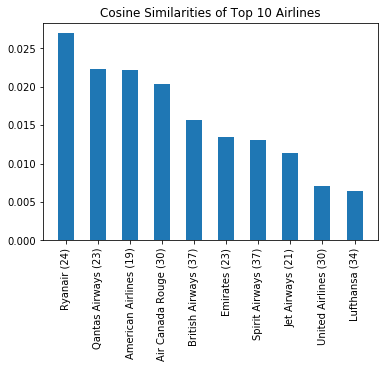

In [30]:
## Plot of cosine similarities:
import numpy as np
labels, ys = zip(*list_of_cosine_similarities)
xs = np.arange(len(labels)) 
width = .5

plt.bar(xs, ys, width, align='center')
plt.title('Cosine Similarities of Top 10 Airlines')
plt.xticks(xs, labels)
plt.xticks(rotation=90)
plt.show()

**SENTIMENT ANALYSIS WORK**

In [37]:
#att dictionary
attr_dict = {'delayed':'scheduling','on time':'scheduling','late':'scheduling','early':'scheduling',
            'food':'service','flight attendant':'service','beverage':'service','drink':'service','breakfast':'service','lunch':'service','dinner':'service','meal':'service',
            'available':'booking','cancel':'booking','refund':'booking','ticket':'booking','customer service':'booking',
            'expensive':'price','cheap':'price','cost':'price','value':'price',
            'seat':'comfort','leg room':'comfort',
            'movie':'entertainment','tv':'entertainment','wifi':'entertainment','gogo':'entertainment'}
list_imp_words=attr_dict.keys()
for word in ['scheduling','service','booking','price','comfort','entertainment']:
    list_imp_words.append(word)

In [38]:
def drop_nums(df):
    """
    drops numbers from the content clean row
    returns a dataframe
    """
    for i in range(0,len(df.content_clean.values)):
        df.content_clean.values[i]=re.sub(r'\d+', '', df.content_clean.values[i])
    return df

In [39]:
def regex_clean_words(df):
    """
    tokenizes the words in the review
    returns a list of words
    """
    tokenizer = RegexpTokenizer(r'\w+')
    content_list=df.content_clean.values.tolist()
    words=[]
    for i in range(0,len(content_list)):
        words1=tokenizer.tokenize(content_list[i])
        words.append(words1)
    return words

In [40]:
def sentiment_of_nearby_words(list_of_review_words,list_imp_words): 
    """
    builds a dataframe based off words from a dictionary of 
    the two words that proceeds the key word and the two follow words
    returns the key word and nearby words
    """
    word_sentiments=pd.DataFrame(columns=['imp words','nearby words', 'sent score'])
    nearby_words=[]
    df_words=[]
    for review in list_of_review_words:
        for word in list_imp_words:

            for i in range(len(review)):
                if word == review[i]:
                    if i==0:
                        nearby_word_list = review[i] + ' ' + review[i+1] + ' ' + review[i+2]
                        nearby_words.append(nearby_word_list)
                        df_words.append(word)
                    elif i==1:
                        nearby_word_list = review[i-1] + ' ' + review[i] + ' ' + review[i+1] + ' ' + review[i+2]
                        nearby_words.append(nearby_word_list)
                        df_words.append(word)
                    elif i==(len(review)-2):
                        nearby_word_list = review[i-2] + ' ' + review[i-1] + ' ' + review[i] + ' ' + review[i+1]
                        nearby_words.append(nearby_word_list)
                        df_words.append(word)
                    elif i==(len(review)-1):
                        nearby_word_list = review[i-2] + ' ' + review[i-1] + ' ' + review[i] 
                        nearby_words.append(nearby_word_list)
                        df_words.append(word)
                    else:
                        nearby_word_list = review[i-2] + ' ' + review[i-1] + ' ' + review[i] + ' ' + review[i+1] + ' ' + review[i+2] 
                        nearby_words.append(nearby_word_list)
                        df_words.append(word)
    word_sentiments['imp words']=df_words
    word_sentiments['nearby words']=nearby_words
    return word_sentiments

In [41]:
sid = SentimentIntensityAnalyzer()
def sent_int_analyze(nearby_words_df):
    ''' 
    takes in a string of words
    returns the sentiment using the vader analyzer
    '''
    for i in range(len(nearby_words_df)):

        temp_line = nearby_words_df['nearby words'][i]

        ss = SentimentIntensityAnalyzer().polarity_scores(temp_line)

        nearby_words_df['sent score'][i] = ss['compound']
    return nearby_words_df

In [201]:
attr_dict = {'delayed':'scheduling','on time':'scheduling','late':'scheduling',
                  'early':'scheduling','delay':'scheduling','board':'scheduling', 'connection':'scheduling',
                  'food':'service','flight attendant':'service','beverage':'service','drink':'service',
                  'breakfast':'service','lunch':'service','dinner':'service','drinks':'service',
                  'snack':'service','snacks':'service',
                  'available':'booking','cancel':'booking','refund':'booking','ticket':'booking',
                  'customer service':'booking',
                  'expensive':'price','cheap':'price','cost':'price','value':'price','pay':'price',
                  'seat':'comfort','leg room':'comfort','cabin':'comfort','seats':'comfort',
                  'lounge':'comfort','air conditioning':'comfort','ac':'comfort',
                  'movie':'entertainment','tv':'entertainment','wifi':'entertainment',
                  'gogo':'entertainment'}

In [43]:
def replace_imp_words(s):
    ''' 
    replaces values with the keys from a dictionary for words in a list 
    '''
    attr=[]
    for word in s:
        if word in attr_dict:
            attr.append(attr_dict[word])
        else:
            attr.append(word)
    return attr

In [44]:
def find_avg_sent_score(word_sent_df):
    ''' 
    finds the average sentiment score for all of the entries in each of the attribute categories 
    '''
    word_sent_df['attributes']=replace_imp_words(word_sent_df['imp words'])
    word_sent_df['sent score']=word_sent_df['sent score'].astype(float)
    return word_sent_df.groupby('attributes')[['sent score']].mean()

In [47]:
def super_sentiment_function(individual_airline_df):
    ''' 
    takes in a airline dataframe
    returns the average sentiment scores for the desired attributes
    '''
    a = drop_nums(individual_airline_df)
    b = regex_clean_words(a)
    c = sentiment_of_nearby_words(b,list_imp_words)
    d = sent_int_analyze(c)
    e = find_avg_sent_score(d)
    return e

In [57]:
sent_int_analyze(sentiment_of_nearby_words(regex_clean_words(drop_nums(df_spirit)),list_imp_words))

,imp words,nearby words,sent score
0,seat,want random seat drinks including,0.0772
1,cost,trying low cost budget airline,-0.2732
2,cost,took combine cost fact cancel,-0.25
3,cancel,cost fact cancel one connecting,-0.25
4,expensive,flight makes expensive airline isn,0
5,late,whole day late top really,0.2023
6,seat,on bag seat requests anywhere,0
7,ticket,hour wait ticket counter causing,0
8,ticket,hour wait ticket counter got,0
9,service,horrible customer service first hour,-0.5423


In [55]:
#builds dataframes for the top 10 airlines
df_spirit=airline_data[airline_data['airline_name']=='spirit-airlines']
df_ba=airline_data[airline_data['airline_name']=='british-airways']
df_ua=airline_data[airline_data['airline_name']=='united-airlines']
df_ja=airline_data[airline_data['airline_name']=='jet-airways']
df_acr=airline_data[airline_data['airline_name']=='air-canada-rouge']
df_em=airline_data[airline_data['airline_name']=='emirates']
df_ra=airline_data[airline_data['airline_name']=='ryanair']
df_aa=airline_data[airline_data['airline_name']=='american-airlines']
df_luf=airline_data[airline_data['airline_name']=='lufthansa']
df_qa=airline_data[airline_data['airline_name']=='qantas-airways']

In [58]:
#finds the average sentiment for each of the attributes for the top 10 airlines
sent_spirit = super_sentiment_function(df_spirit)
sent_ba = super_sentiment_function(df_ba)
sent_ua = super_sentiment_function(df_ua)
sent_ja = super_sentiment_function(df_ja)
sent_acr = super_sentiment_function(df_acr)
sent_em = super_sentiment_function(df_em)
sent_ra = super_sentiment_function(df_ra)
sent_aa = super_sentiment_function(df_aa)
sent_luf = super_sentiment_function(df_luf)
sent_qa = super_sentiment_function(df_qa)


In [59]:
#creates a combined dataframe of all of the desired attributes for each of the top 10 airlines
sent_scores_df =sent_spirit.merge(sent_ba,right_index=True, left_index=True)\
.merge(sent_ua,right_index=True, left_index=True).merge(sent_ja,right_index=True, left_index=True)\
.merge(sent_acr,right_index=True, left_index=True).merge(sent_em,right_index=True, left_index=True).merge(sent_ra,right_index=True, left_index=True)\
.merge(sent_aa,right_index=True, left_index=True).merge(sent_luf,right_index=True, left_index=True)\
.merge(sent_qa,right_index=True, left_index=True)

senti_w_names = pd.DataFrame(data=sent_scores_df.values)
senti_w_names.columns = ['spirit_airlines','british_airways','united_airlines',
                       'jet_airways','air_canada-rouge','emirates','ryanair',
                       'american_airlines','lufthansa','qantas_airways']
new_index =pd.DataFrame(data = ['booking', 'comfort', 'entertainment', 'price', 'scheduling',
       'service'], columns = ['imp_word'])
senti_w_names=senti_w_names.merge(new_index,right_index=True, left_index=True)
senti_w_names.set_index(['imp_word'])

,spirit_airlines,british_airways,united_airlines,jet_airways,air_canada-rouge,emirates,ryanair,american_airlines,lufthansa,qantas_airways
imp_word,,,,,,,,,,
booking,0.001731,0.068498,0.028434,0.056738,0.034063,0.111136,0.045530,0.000112,0.039509,0.091495
comfort,0.043336,0.106502,0.097942,0.136747,0.040302,0.174133,0.076939,0.113956,0.170083,0.198854
entertainment,0.283340,0.351379,0.329599,0.361194,0.300053,0.479446,0.507021,0.276339,0.385600,0.435989
price,0.030429,0.151552,0.087174,0.233008,0.054991,0.233417,0.134274,0.022059,0.213311,0.134070
scheduling,-0.146201,-0.057141,-0.118122,-0.080094,-0.116526,-0.073538,-0.049713,-0.147791,-0.068140,-0.009771
service,-0.034472,0.172483,0.052434,0.162543,0.044372,0.156423,0.098382,0.115213,0.285287,0.208220


# Sentiment Score, Attributes and Nationality

In [264]:
#calculating sentiment for attributes depending on nationality
sent_uk = super_sentiment_function(df_uk)
sent_us = super_sentiment_function(df_us)
sent_aus = super_sentiment_function(df_aus)
sent_can = super_sentiment_function(df_can)
sent_ger = super_sentiment_function(df_ger)

In [276]:
sent_scores_nation_df =sent_uk.merge(sent_us,right_index=True, left_index=True)\
.merge(sent_aus,right_index=True, left_index=True).merge(sent_can,right_index=True, left_index=True)\
.merge(sent_ger,right_index=True, left_index=True)

senti_nation_w_names = pd.DataFrame(data=sent_scores_nation_df.values)
senti_nation_w_names.columns = ['UK','US','AUS','CAN','GER']

senti_nation_w_names

,UK,US,AUS,CAN,GER
0,0.042705,0.018695,0.049353,0.023869,0.060605
1,0.117890,0.099511,0.141733,0.082557,0.166928
2,0.373935,0.338613,0.386080,0.301818,0.384072
3,0.098315,0.116041,0.111575,0.119629,0.157289
4,0.175776,0.107457,0.201754,0.135232,0.223173
5,-0.071676,-0.115529,-0.063679,-0.116665,-0.098437
6,0.165619,0.140571,0.203039,0.135141,0.199336


# Sentiment Score Prediction

Average sentiment for each airline- Which airline has the most positive reviews? out of the top 10 airlines

Which nationality leaves the most positive reviews?

In [80]:
airline_data['sent score']=''
small=airline_data[:2]
small
top_10_airlines_vc.index

Index([u'spirit-airlines', u'british-airways', u'united-airlines',
       u'jet-airways', u'air-canada-rouge', u'emirates', u'ryanair',
       u'american-airlines', u'lufthansa', u'qantas-airways'],
      dtype='object')

In [64]:
sid = SentimentIntensityAnalyzer()
def sent_int_analyze_whole_review(df):
    ''' 
    takes in a string of words
    returns the sentiment using the vader analyzer
    '''
    for i in range(len(df)):

        temp_line = df['content_clean'][i]

        ss = SentimentIntensityAnalyzer().polarity_scores(temp_line)

        df['sent score'][i] = ss['compound']
    return df

In [105]:
sent_int_analyze_whole_review(top_10_df)

/Users/daniellediehl/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,index,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,...,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended,content_clean,sent score
0,1585,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Roger Duarte Neves,Canada,2015-08-01,"Flew to Lisbon from Toronto July 27 2015, plan...",Boeing 767-300,Couple Leisure,...,1.0,4.0,1.0,1.0,3.0,3.0,2.0,0,"flew lisbon toronto july 27 2015, plane older ...",0.0516
1,1592,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Mustapha Aissaoui,Canada,2015-07-31,We are a family of 5 who had booked a flight f...,Boeing 767-300,FamilyLeisure,...,1.0,4.0,2.0,1.0,3.0,1.0,1.0,0,family 5 booked flight montreal athens aegean ...,0.9287
2,1593,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Colin Dinh,Canada,2015-07-27,I was hesitant to book this airline going to O...,NaN,FamilyLeisure,...,3.0,5.0,5.0,3.0,4.0,NaN,4.0,1,hesitant book airline going osaka due negative...,0.802
3,1600,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Fran Booth,Canada,2015-07-27,I checked our family of 6 in online before we ...,Boeing 767,FamilyLeisure,...,1.0,2.0,1.0,1.0,4.0,3.0,1.0,0,"checked family 6 online departed yvr. reason, ...",-0.3607
4,1601,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Christopher Neep,Canada,2015-07-25,Air Canada rouge was a disgrace at least on th...,Airbus 319,Solo Leisure,...,1.0,1.0,1.0,NaN,2.0,NaN,2.0,0,air canada rouge disgrace least flight. aircra...,-0.5563
5,1608,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Joyce Zak,Canada,2015-07-24,"Fine going to Vancouver, but on return there w...",NaN,Solo Leisure,...,3.0,2.0,NaN,NaN,1.0,NaN,1.0,0,"fine going vancouver, return big delay! 3 hour...",-0.4753
6,1609,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Natalia Tchernycheva,Canada,2015-07-24,Flying AC1753 from Varadero to Toronto (connec...,NaN,Solo Leisure,...,2.0,2.0,1.0,NaN,3.0,NaN,1.0,0,flying ac1753 varadero toronto (connected fly)...,0.6808
7,1610,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Chris Kenyon,Australia,2015-07-23,We were a bit apprehensive about flying with C...,Boeing 737,Couple Leisure,...,3.0,3.0,NaN,NaN,3.0,NaN,4.0,1,bit apprehensive flying canada rouge given amo...,0.9439
8,1620,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Tyler Christensen,United States,2015-07-22,It was a 12 hour flight from Vancouver to Osak...,NaN,FamilyLeisure,...,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0,12 hour flight vancouver osaka screen entertai...,-0.1511
9,1621,air-canada-rouge,/airline-reviews/air-canada-rouge,Air Canada rouge customer review,Chris Turcotte,Canada,2015-07-22,I would not recommend Air Canada Rouge to anyo...,NaN,FamilyLeisure,...,3.0,5.0,NaN,3.0,1.0,5.0,2.0,0,would recommend air canada rouge anyone. start...,-0.6124


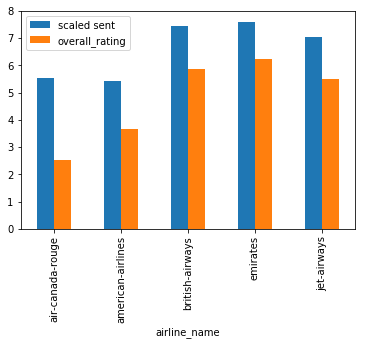

In [261]:
def conv_scale(s):
    return ((s*10)+10)/2
top_10_df['scaled sent']=top_10_df['sent score'].map(conv_scale)
top_10_df['scaled_minus_overall']=top_10_df['scaled sent'].astype(float)-top_10_df['overall_rating'].astype(float)
#top_10_df[['airline_name','scaled sent','overall_rating','scaled_minus_overall']].groupby('airline_name').mean().plot(kind='bar')

top_10_df[['airline_name','scaled sent','overall_rating']].groupby('airline_name').mean()[:5].plot(kind='bar')
plt.show()

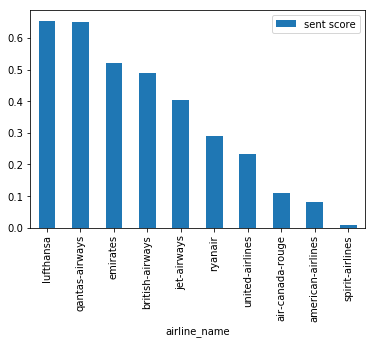

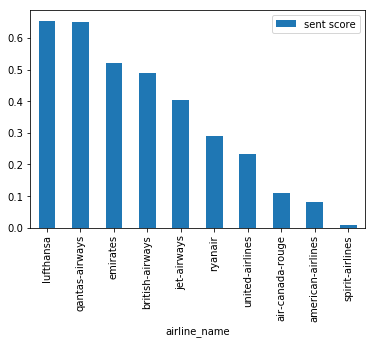

In [245]:
#which airline has the highest average sentiment? 
top_10_df.groupby('airline_name')[['sent score']].mean().sort_values('sent score', ascending=False).plot(kind='bar')
plt.show()

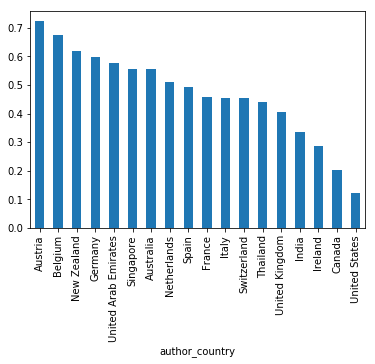

In [277]:
#which nationality has highest satisfaction?
country_satisfaction=top_10_df.groupby('author_country')[['sent score']].agg(['mean','count'])

mask=(country_satisfaction['sent score']['count']>30)
country_satisfaction[mask]['sent score']['mean'].sort_values(ascending=False).plot(kind='bar')
plt.show()

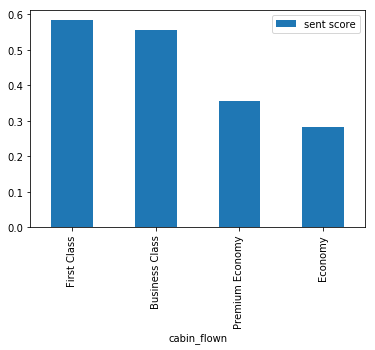

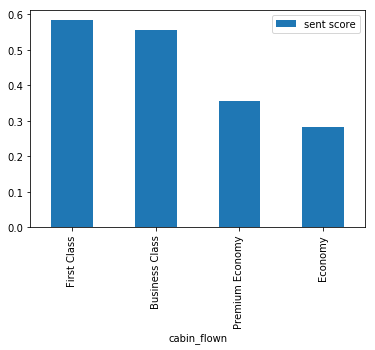

In [243]:
#which economic class has highest average sentiment?
import matplotlib.pyplot as plt
cabin_sent=top_10_df.groupby('cabin_flown')[['sent score']].mean()

cabin_sent.sort_values('sent score',ascending=False).plot(kind='bar')
plt.show()

# Lift Values for Attributes for Top 10 Airlines

In [202]:
def replace_words(s):
    for word in attr_dict.keys():
        if word in s:
            s=s.replace(word,attr_dict[word])
    return s

In [279]:
top_10_df['content_clean']=top_10_df['content_clean'].map(replace_words)

In [280]:
def lift(a, b):
    num = len(top_10_df) #3635
    num_a = len(top_10_df[top_10_df['airline_name'].str.contains(a)]) #working
    num_b = len(top_10_df[top_10_df['content_clean'].str.contains(b)]) #working
    if_has_a = top_10_df[top_10_df['airline_name'].str.contains(a)] #working
    num_a_and_b = len(if_has_a['airline_name'][if_has_a['content_clean'].str.contains(b)]) #NOT WORKING
    return num*float(num_a_and_b)/(num_a * num_b)
lift('spirit-airlines','service')

0.6184984549650937

In [281]:
top10list = ['spirit-airlines','british-airways','united-airlines','jet-airways',
'air-canada-rouge','emirates','ryanair','american-airlines','lufthansa',
'qantas-airways']

attr_list = ['scheduling','service','booking','price','comfort','entertainment']

attribute_df = pd.DataFrame(columns=top10list, index=attr_list)

for attribute, series in list(attribute_df.iterrows()):
    for brand in series.index:
        attribute_df[brand].loc[attribute] = lift(brand, attribute)

attribute_df

,spirit-airlines,british-airways,united-airlines,jet-airways,air-canada-rouge,emirates,ryanair,american-airlines,lufthansa,qantas-airways
scheduling,1.24754,0.95288,1.18881,0.995794,0.625821,0.89763,1.2799,1.12941,0.78518,0.733852
service,0.618498,1.27062,0.913464,1.066,0.944382,1.31253,0.492105,0.955376,1.2277,1.35735
booking,1.83222,0.690133,1.45187,0.85531,0.74474,0.651287,1.02332,1.20127,0.503861,0.592313
price,1.87467,0.760104,0.804714,0.884935,1.23151,0.484826,1.65358,0.818693,0.52377,0.577612
comfort,0.929197,1.06991,0.959788,0.989298,1.10649,1.02741,0.925557,0.987543,0.991827,1.02603
entertainment,0.187921,0.939299,0.990139,1.16411,2.04587,1.45704,0.0831584,1.06098,1.18556,1.23902
